<a href="https://colab.research.google.com/github/Siddhant-K-code/Emotions-Classification/blob/main/emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install keras
!pip install matplotlib
!pip install scikit-plot

import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Create a Dataframe for reading and analysing the text files easily

In [103]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Siddhant-K-code/emotions-classification-dataset/main/train.txt?token=ANEESCH3D6RYYKDTWA7ONXLAEPA7K', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('https://raw.githubusercontent.com/Siddhant-K-code/emotions-classification-dataset/main/test.txt?token=ANEESCCHCPCLNAEAEAOV2OLAEPA4W', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('https://raw.githubusercontent.com/Siddhant-K-code/emotions-classification-dataset/main/val.txt?token=ANEESCC7A43DJ5BR6M7TXHLAEPBAW',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [104]:
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
hate         300
Name: Sentiment, dtype: int64

## Reading the Train and Validation Data

In [62]:
X=df_train['Input']


In [63]:
lst=[]
for i in X:
  lst.append(len(i))


In [64]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16300.000000
mean,97.200368
std,55.892579
min,7.000000
25%,54.000000
50%,86.000000
75%,130.000000
max,327.000000


In [65]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

# Trying to fix a length for the embedding layers' input

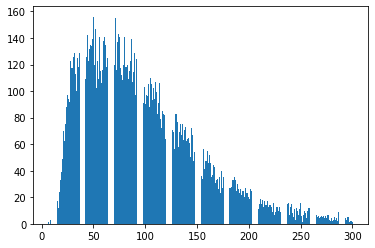

In [66]:
plt.bar(range(7,301),cts)
plt.show()

# Using The tokenizer Class to convert the sentences into word vectors

In [67]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [68]:
len(tokenizer.word_index)

16448

In [69]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [70]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5,'hate':6})

In [71]:
Y_train=df_train['Sentiment'].values


# One hot Encoding the Emotion Values

In [72]:
Y_train_f=to_categorical(Y_train)

In [73]:
Y_train_f[:7]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [74]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5,'hate':6})

In [75]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [76]:
Y_val_f=to_categorical(Y_val)

In [77]:
Y_val_f[:7]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [78]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout


# Creating a Model

In [79]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.7))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(7,activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 80, 64)            973568    
_________________________________________________________________
dropout_4 (Dropout)          (None, 80, 64)            0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 2247      
Total params: 1,479,495
Trainable params: 1,479,495
Non-trainable params: 0
_________________________________________________________________
None


# Compiling and running the model

In [80]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
510/510 [==============================] - 244s 467ms/step - loss: 1.5671 - accuracy: 0.3689 - val_loss: 0.9005 - val_accuracy: 0.6544
Epoch 2/12
510/510 [==============================] - 236s 463ms/step - loss: 0.7068 - accuracy: 0.7300 - val_loss: 0.4163 - val_accuracy: 0.8616
Epoch 3/12
510/510 [==============================] - 235s 461ms/step - loss: 0.3551 - accuracy: 0.8762 - val_loss: 0.2639 - val_accuracy: 0.9042
Epoch 4/12
510/510 [==============================] - 235s 461ms/step - loss: 0.2587 - accuracy: 0.9075 - val_loss: 0.2378 - val_accuracy: 0.9114
Epoch 5/12
510/510 [==============================] - 234s 458ms/step - loss: 0.2118 - accuracy: 0.9231 - val_loss: 0.2402 - val_accuracy: 0.9100
Epoch 6/12
510/510 [==============================] - 234s 460ms/step - loss: 0.1876 - accuracy: 0.9309 - val_loss: 0.2439 - val_accuracy: 0.9158
Epoch 7/12
510/510 [==============================] - 234s 459ms/step - loss: 0.1586 - accuracy: 0.9411 - val_loss: 0.2062 -

# Plotting the Loss and Accuracy Curves

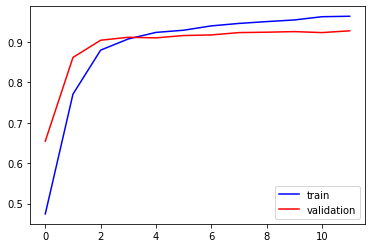

In [82]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

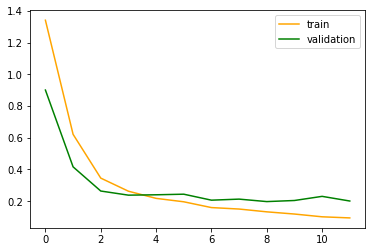

In [83]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# Checking for Test Data

In [85]:
X_test=df_test['Input']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5,'hate':6})

In [86]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [87]:
Y_test_f=to_categorical(Y_test)

In [88]:
X_test_pad.shape

(2004, 80)

In [89]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Accuracy for Test Data

In [90]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 8s 125ms/step - loss: 0.1912 - accuracy: 0.9197


[0.19124265015125275, 0.9196606874465942]

# Plotting the Confusion matrix 

In [91]:
Y_pred=model.predict_classes(X_test_pad)

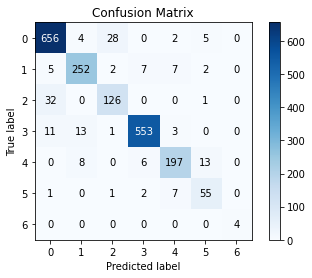

In [92]:
plot_confusion_matrix(Y_test,Y_pred)

In [93]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       695
           1       0.91      0.92      0.91       275
           2       0.80      0.79      0.79       159
           3       0.97      0.95      0.96       581
           4       0.91      0.88      0.90       224
           5       0.72      0.83      0.77        66
           6       1.00      1.00      1.00         4

    accuracy                           0.92      2004
   macro avg       0.89      0.90      0.90      2004
weighted avg       0.92      0.92      0.92      2004



# Creating a Function to check for Your own Sentence

In [96]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5,'hate':6}
    for key,val in dictionary.items():
          if (val==value):
            return key



In [97]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(model.predict_classes(sentence_padded))
  print("The emotion predicted is",ans)

# Check for Your Own Sentence

In [107]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : chup bsdk kutte, marja saale 
The emotion predicted is hate
